In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def D_a(z, H_0, c, Omega_r0, Omega_m0, Omega_l0, w):

    f = f_k(z, H_0, c, Omega_r0, Omega_m0, Omega_l0, w)

    return f/(1 + z)

def D_L(z, H_0, c, Omega_r0, Omega_m0, Omega_l0, w):

    f = f_k(z, H_0, c, Omega_r0, Omega_m0, Omega_l0, w)

    return f * (1 + z)

[]

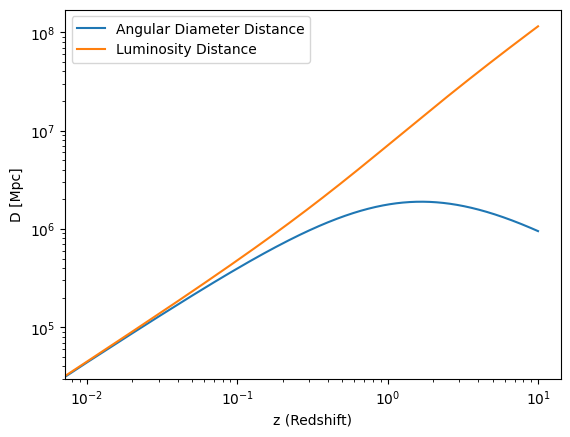

In [21]:
zs = np.linspace(0, 10, 1_000)

D_a_values = [D_a(z, 67.4, 3e8 , 1e-4, 0.25, 0.75, -1) for z in zs]

D_L_values = [D_L(z, 67.4, 3e8 , 1e-4, 0.25, 0.75, -1) for z in zs]

plt.loglog(zs, D_a_values, label='Angular Diameter Distance')
plt.loglog(zs, D_L_values, label='Luminosity Distance')
plt.xlabel('z (Redshift)')
plt.ylabel('D [Mpc]')
plt.legend()
plt.plot()

In [3]:
# Importar las bibliotecas necesarias
import camb
from camb import model

H0 = 67.4 # km/s/Mpc
omega_m = 0.315
omega_ch2 = 0.120
omega_bh2 = 0.0224
Omega_r0 = 8.051 * 1e-5
ns = 0.965
tau = 0.054
c = 299792 #km/s
w = -1

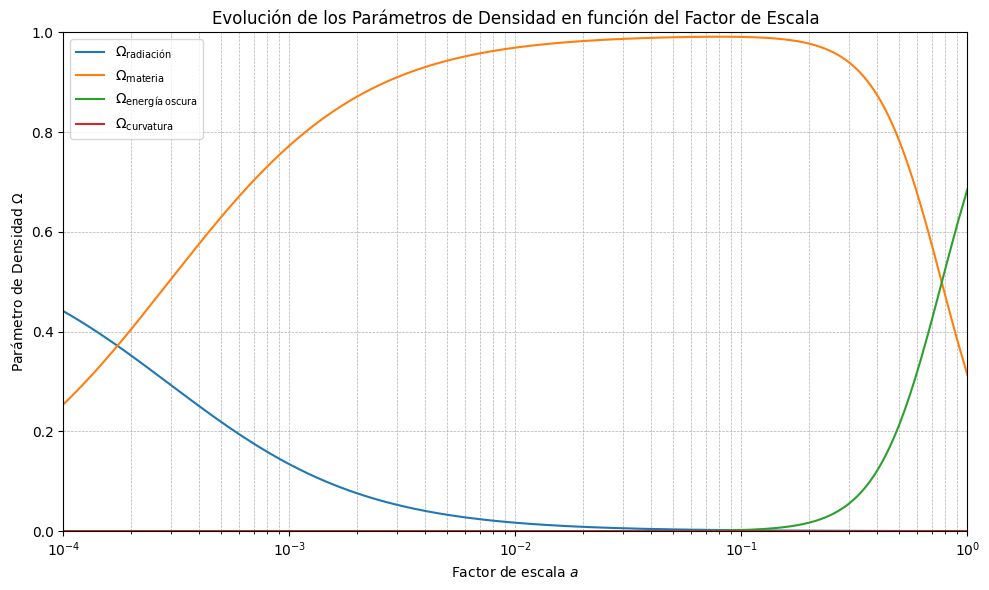

In [22]:
# Configurar los parámetros cosmológicos
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=omega_bh2, omch2=omega_ch2, tau=tau)
#pars.InitPower.set_params(ns=0.965)
pars.set_dark_energy(w=w)

# Obtener los resultados de la simulación
results = camb.get_results(pars)

# Definir el rango de redshift
z_max = 10000  # redshift máximo
nz = 100000     # número de pasos de redshift
redshifts = np.linspace(0, z_max, nz)

# Obtain the scale factor values from the redshift values
a_values = 1 / (1 + redshifts)

Omega_radiation = results.get_Omega('photon', redshifts)
Omega_matter = results.get_Omega('cdm', redshifts) + results.get_Omega('baryon', redshifts)
Omega_lambda = results.get_Omega('de', redshifts)
Omega_curvature = results.get_Omega('K', redshifts)

plt.figure(figsize=(10, 6))
plt.semilogx(a_values, Omega_radiation, label=r'$\Omega_\mathrm{radiación}$')
plt.semilogx(a_values, Omega_matter, label=r'$\Omega_\mathrm{materia}$')
plt.semilogx(a_values, Omega_lambda, label=r'$\Omega_\mathrm{energía\,oscura}$')
plt.semilogx(a_values, Omega_curvature, label=r'$\Omega_\mathrm{curvatura}$')

# Adjust y-axis range from 0 to 1
plt.ylim(0, 1)
plt.xlim(min(a_values), max(a_values))

# Add labels and legend
plt.xlabel(r'Factor de escala $a$')
plt.ylabel(r'Parámetro de Densidad $\Omega$')
plt.title('Evolución de los Parámetros de Densidad en función del Factor de Escala')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [23]:
def Hubble(z, H_0, Omega_r0, Omega_m0, Omega_l0, w):

    Omega_k0 = 1 - Omega_l0 - Omega_r0 - Omega_m0

    first = Omega_r0 * (1 + z) ** 4
    second = Omega_m0 * (1 + z) ** 3
    third = Omega_l0 * (1 + z) ** (3 * (1 + w))
    fourth = Omega_k0 * (1 + z) ** 2

    return np.sqrt((H_0 ** 2) * (first + second + third + fourth))

In [24]:
def E(z, H_0, Omega_r0, Omega_m0, Omega_l0, w):

    E = Hubble(z, H_0, Omega_r0, Omega_m0, Omega_l0, w)/H_0

    return 1/E

In [25]:
from scipy.integrate import quad

def f_k(z, H_0, c, Omega_r0, Omega_m0, Omega_l0, w):

    Omega_k0 = 1 - Omega_l0 - Omega_r0 - Omega_m0

    integral, error = quad(lambda z_prime: E(z_prime, H_0, Omega_r0, Omega_m0, Omega_l0, w), 0, z)
    
    if Omega_k0 > 0:
        cte = (c / (H_0 * np.sqrt(Omega_k0)))

        return cte * np.sinh(np.sqrt(Omega_k0) * integral)
    
    elif Omega_k0 < 0:
        cte = (c / (H_0 * np.sqrt(-Omega_k0)))

        return cte * np.sin(np.sqrt(-Omega_k0) * integral)
    
    else:
        return (c/H_0) * integral

In [35]:
# Define grid
Omegas_m = np.linspace(0, 5, 400)
Omegas_l = np.linspace(0, 5, 400)
X, Y = np.meshgrid(Omegas_m, Omegas_l)
Z = np.zeros((len(Omegas_l), len(Omegas_m)))

z = 1

# Calculate the values for f_k over the grid
for i in range(0, len(Omegas_m)):
    for j in range(0, len(Omegas_l)):
        Omega_m0 = Omegas_m[i]
        Omega_l0 = Omegas_l[j]
        Z[j, i] = f_k(z, H0, c, Omega_r0, Omega_m0, Omega_l0, w)

C:\Users\lecto\AppData\Local\Temp\ipykernel_25172\2517197530.py:10: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt((H_0 ** 2) * (first + second + third + fourth))
C:\Users\lecto\AppData\Local\Temp\ipykernel_25172\3542832372.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral, error = quad(lambda z_prime: E(z_prime, H_0, Omega_r0, Omega_m0, Omega_l0, w), 0, z)


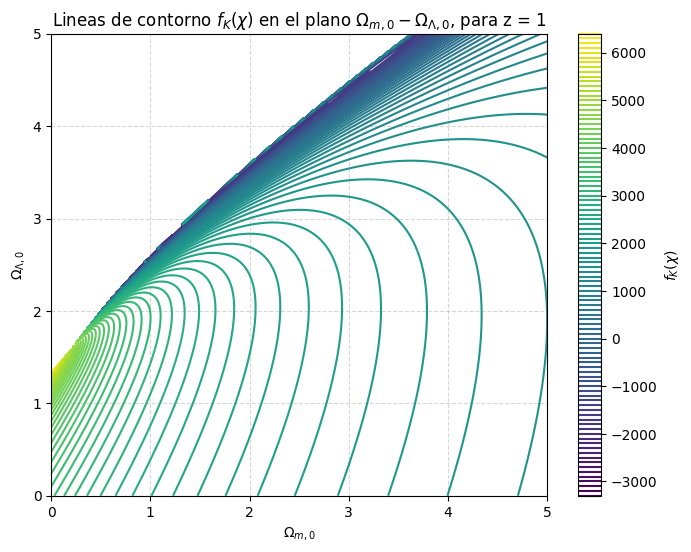

In [36]:
# Plot the contour lines
plt.figure(figsize=(8, 6))
contour_plot = plt.contour(X, Y, Z, levels=100, cmap='viridis')
plt.title(r'Lineas de contorno $f_K(\chi)$ en el plano $\Omega_{m,0} - \Omega_{\Lambda,0}$, para z = 1')
plt.xlabel(r'$\Omega_{m,0}$')
plt.ylabel(r'$\Omega_{\Lambda,0}$')
plt.grid(True, linestyle='--', alpha=0.5)

colorbar = plt.colorbar(contour_plot)
colorbar.set_label(r'$f_K(\chi)$')

plt.show()